# **Simulasi Numerik Penyebaran Gelombang Bunyi Di Ruangan 2D Secara Numerik**


Penyebaran gelombang bunyi di dalam ruangan dipengaruhi oleh perambatan langsung dan pantulan dari batas ruangan. Untuk menangkap fenomena transient (pulse, arrival time, gema) tanpa solusi analitik, kita gunakan metode numerik FDTD yang menghitung tekanan
𝑝
(
𝑥
,
𝑦
,
𝑡
) pada grid ruang-waktu. Hasil simulasi memungkinkan analisis pola tekanan, sinyal di receiver, dan spektrum frekuensi.

**1. Persamaan Dasar (Persamaan Euler Linear dan Persamaan Kontinuitas)**
Model akustik linier didasarkan pada dua persamaan fundamental fluida untuk gangguan kecil. Pertama, hubungan antara gradien tekanan dan percepatan partikel diberikan oleh persamaan momentum linier
$$
\rho_0 \, \frac{\partial v}{\partial t} = - \nabla p
\tag{1}
$$

Kedua, perubahan densitas akibat kompresi lokal diberikan oleh persamaan kontinuitas
$$
\frac{\partial \rho'}{\partial t}
= -\, \rho_0 \, \nabla \cdot v
\tag{2}
$$

Dengan:

$𝑝$   = tekanan akustik

$𝑣$  = kecepatan partikel

$𝜌
0$ ​= densitas udara

$𝜌
′$ = perubahan densitas (variasi kecil)


**2.Hubungan Tekanan–Densitas (Persamaan Keadaan Linier)**

Untuk gangguan kecil, hubungan antara tekanan dan densitas diberikan oleh
$$
p = c^2 \rho'
$$
dengan
$𝑐$ merupakan kecepatan rambat bunyi.

**3.Eliminasi Variabel untuk Mendapatkan Persamaan Gelombang**

Substitusi $
\rho' = \frac{p}{c^2}
$ ke dalam persamaan kontinuitas menghasilkan

$$
\frac{1}{c^2}\frac{\partial p}{\partial t} = -\rho_0 \nabla \cdot \mathbf{v}
$$

Selanjutnya dikalikan dengan
$𝑐
2$ sehingga

$$
\frac{\partial p}{\partial t} = -\frac{\rho_0}{c^2}\,\nabla \cdot \mathbf{v}
\tag{3}
$$

Ambil divergensi dari persamaan momentum

$$
\rho_0 \frac{\partial}{\partial t}(\nabla \cdot \mathbf{v}) = -\nabla^2 p
\tag{4}
$$

Diferensiasi (3) terhadap waktu dan substitusi (4) menghasilkan
$$
\frac{\partial^2 p}{\partial t^2} = c^2 \nabla^2 p
$$

Jika terdapat sumber, ditambahkan fungsi
$
𝑠
(
𝑥
,
𝑦
,
𝑡
)
$ sehingga menjadi


$$
\frac{\partial^2 p}{\partial t^2} = c^2 \nabla^2 p + s(x,y,t)
\tag{5}
$$

**4. Diskritisasi Ruang (Finite Difference Orde-2)**
Operator Laplace 2D didiskritisasi menggunakan skema lima titik:
$$
\nabla^2 p_{i,j}^n \approx \frac{p_{i+1,j}^n + p_{i-1,j}^n + p_{i,j+1}^n + p_{i,j-1}^n - 4p_{i,j}^n}{h^2}\tag{6}
$$

**5. Diskritisasi Waktu (Turunan Kedua Orde-2)**

Turunan kedua waktu didiskritisasi dengan

$$
\frac{\partial^2 p}{\partial t^2} \approx
\frac{p_{i,j}^{n+1} - 2p_{i,j}^{n} + p_{i,j}^{n-1}}{\Delta t^2}\tag{7}
$$

**6. Substitusi ke Persamaan Gelombang**

Masukkan (6) dan (7) ke dalam (5):

$$
\frac{p_{i,j}^{\,n+1} - 2p_{i,j}^{\,n} + p_{i,j}^{\,n-1}}{\Delta t^2}
=
c^2 \frac{
p_{i+1,j}^{\,n} +
p_{i-1,j}^{\,n} +
p_{i,j+1}^{\,n} +
p_{i,j-1}^{\,n}
- 4p_{i,j}^{\,n}
}{h^2}
+ s_{i,j}^{\,n}
$$

Mengalikan seluruhnya dengan $\Delta t^2$

$$
p_{i,j}^{n+1}
= 2p_{i,j}^{n}
- p_{i,j}^{n-1}
+ \frac{c^2 \Delta t^2}{h^2}
\left(
p_{i+1,j}^{n} +
p_{i-1,j}^{n} +
p_{i,j+1}^{n} +
p_{i,j-1}^{n} -
4p_{i,j}^{n}
\right)
+ \Delta t^2 s_{i,j}^{n}
$$

**7. Definisi Parameter CFL**

$$
\lambda = \frac{h\,c}{\Delta t}
$$

$$
\lambda^2 = \left( \frac{h\,c}{\Delta t} \right)^2
$$


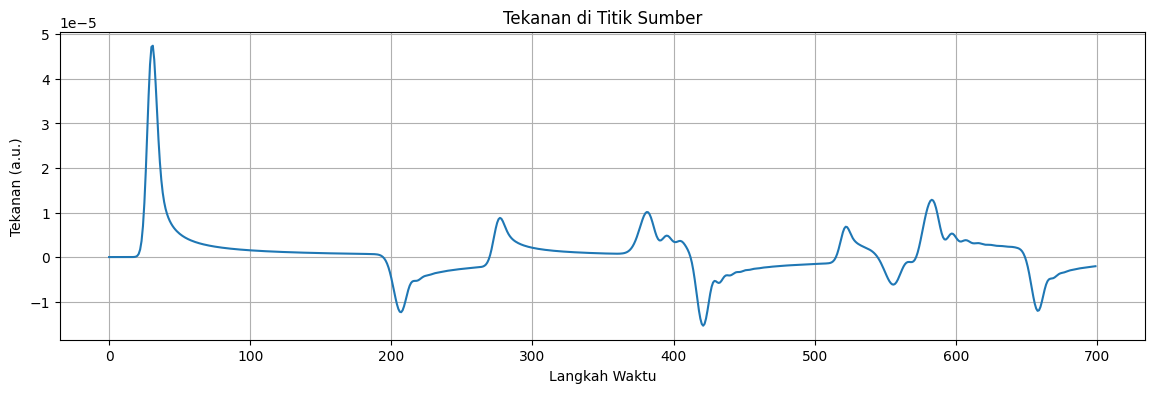

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

c  = 343.0       # kecepatan suara (m/s)
h  = 0.1         # jarak antar grid (m)
dt = 0.0002      # langkah waktu (s)
Nx, Ny = 120, 120   #Jarak antar grid (m)
Nt = 700          # langkah waktu (s)

lambda2 = (c * dt / h)**2

p_now  = np.zeros((Nx, Ny))   # p^n
p_old  = np.zeros((Nx, Ny))   # p^{n-1}
p_next = np.zeros((Nx, Ny))   # p^{n+1}

sx, sy = Nx//2, Ny//2

tekanan_titik = []
tekanan_garis = []
energi_total  = []

for n in range(Nt):

    sumber = 1000 * np.exp(-((n-30)**2)/20)
    p_now[sx, sy] += sumber * dt**2

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):

            lap = (
                p_now[i+1, j] + p_now[i-1, j] +
                p_now[i, j+1] + p_now[i, j-1] -
                4 * p_now[i, j]
            )

            p_next[i, j] = (
                2*p_now[i, j]
                - p_old[i, j]
                + lambda2 * lap
            )
    tekanan_titik.append(p_now[sx, sy])
    tekanan_garis.append(p_now[:, Ny//2])
    energi_total.append(np.sum(p_now**2))

    p_old, p_now = p_now, p_next.copy()

plt.figure(figsize=(14,4))
plt.plot(tekanan_titik)
plt.title("Tekanan di Titik Sumber")
plt.xlabel("Langkah Waktu")
plt.ylabel("Tekanan (a.u.)")
plt.grid(True)
plt.show()

Grafik tekanan di titik sumber menunjukkan pola osilasi yang awalnya kuat lalu perlahan melemah. Ini menggambarkan bahwa impuls sumber menyebar ke luar, sebagian energinya kembali karena pantulan dari batas domain, sehingga muncul gelombang-gelombang kecil yang teramati pada waktu berikutnya.

### **Pertanyaan**

1. Bagaimana pola temporal tekanan akustik pada titik sumber mencerminkan respons impuls sistem, dan apa implikasi bentuk gelombang tersebut terhadap sifat peredaman dan pantulan dalam domain simulasi?
2. Jelaskan bagaimana puncak dan lembah tekanan pada grafik ini dapat diinterpretasikan sebagai superposisi antara gelombang langsung dan gelombang pantulan. Parameter numerik apa yang paling berpengaruh terhadap fenomena ini?

### **Jawaban**
1. Pola temporal tekanan pada titik sumber menampilkan karakteristik respons impuls dari suatu sistem akustik tanpa redaman. Impuls awal yang dominan menunjukkan pelepasan energi utama dari sumber, sedangkan osilasi berikutnya mencerminkan kontribusi gelombang pantulan yang kembali ke lokasi sumber setelah berinteraksi dengan batas domain. Ketiadaan mekanisme peredaman numerik atau absorbsi pada boundary menyebabkan energi yang terpantul tidak mengalami pelemahan signifikan, sehingga gelombang sisa tetap teramati dalam durasi waktu yang relatif panjang. Dengan demikian, bentuk gelombang tersebut mengindikasikan bahwa sistem berada pada kondisi reflektif sempurna, yang menyebabkan respons impuls tidak mereda secara eksponensial sebagaimana sistem fisik dengan disipasi.
2. Puncak–lembah yang muncul pada grafik dapat ditafsirkan sebagai hasil superposisi antara gelombang langsung yang dipancarkan dari sumber dengan gelombang pantulan yang kembali setelah mencapai batas domain. Apabila kedua komponen gelombang tersebut tiba dengan fase yang sejalan, terbentuk puncak amplitudo, sebaliknya, jika keduanya berfase berlawanan, terbentuk lembah yang menandakan interferensi destruktif. Fenomena ini sangat dipengaruhi oleh parameter numerik seperti ukuran grid (h), kecepatan rambat bunyi (c), langkah waktu (Δt) yang menentukan nilai CFL, serta sifat boundary yang dalam simulasi ini bersifat reflektif total. Kombinasi parameter tersebut mengatur bagaimana gelombang mengalami propagasi dan interferensi di dalam medium.

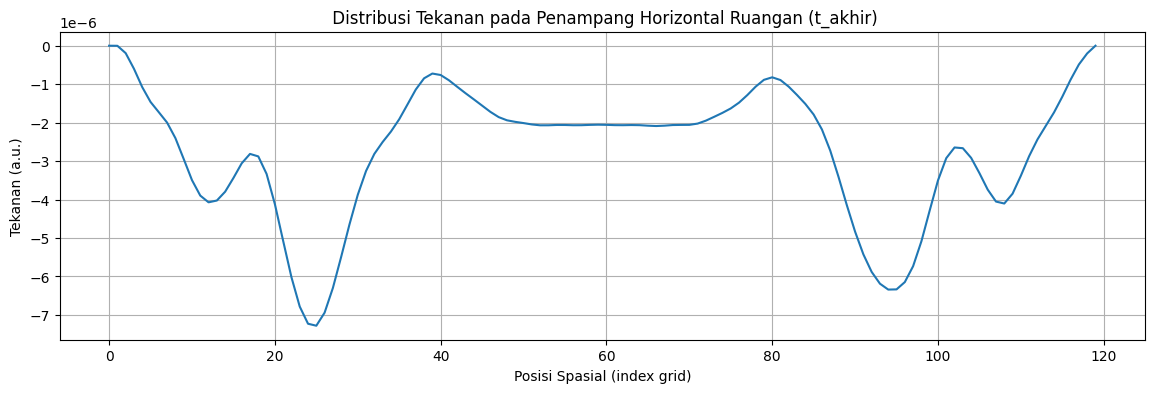

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(tekanan_garis[-1])
plt.title(" Distribusi Tekanan pada Penampang Horizontal Ruangan (t_akhir)")
plt.xlabel("Posisi Spasial (index grid)")
plt.ylabel("Tekanan (a.u.)")
plt.grid(True)
plt.show()

Pola distribusi tekanan pada waktu akhir menunjukkan struktur puncak–lembah yang kompleks dan tidak sepenuhnya simetris. Hal ini merefleksikan dinamika refleksi dan interferensi gelombang yang berlangsung di ruangan tertutup numerik.

### **Pertanyaan**

1. Jika terdapat fluktuasi yang tidak simetris di sepanjang garis profil, faktor fisika atau numerik apa yang dapat menyebabkan ketidaksimetrian tersebut? Bahas dalam konteks kondisi batas dan geometri domain
2. Apakah distribusi tekanan yang diperoleh pada penampang horizontal tersebut telah mencerminkan fenomena fisik penyebaran gelombang akustik dalam ruang tertutup? Jelaskan berdasarkan bentuk kurva yang muncul, termasuk pola puncak–lembah yang terbentuk akibat interferensi dan pantulan gelombang

### **Jawaban**

1. Ketidaksimetrian fluktuasi pada penampang horizontal disebabkan oleh kombinasi faktor fisik dan numerik. Secara fisik, gelombang yang memantul dari empat sisi ruangan memiliki lintasan dan waktu tempuh yang berbeda, sehingga fase gelombang yang tiba pada garis pengamatan tidak identik. Secara numerik, disretisasi ruang menggunakan grid terbatas dapat menghasilkan deviasi kecil terhadap kesimetrian ideal, terutama ketika posisi sumber tidak jatuh tepat pada pusat sel grid. Selain itu, kondisi batas reflektif memperkuat akumulasi gelombang dengan fase yang beragam, sehingga menghasilkan profil yang tampak asimetris.
2. Distribusi tekanan yang diperoleh telah merepresentasikan fenomena fisis penyebaran gelombang akustik di dalam ruang tertutup. Pola puncak–lembah yang terbentuk merupakan indikasi adanya interferensi antara gelombang datang dan pantulan, menghasilkan konfigurasi tekanan yang menyerupai mode ruangan pada domain terbatas. Ketidakteraturan amplitudo pada beberapa lokasi mencerminkan efek pantulan multipel yang saling bertumpang tindih. Dengan demikian, kurva tersebut konsisten dengan karakteristik medan gelombang pada ruangan tanpa absorbsi, di mana distribusi energi tidak merata dan dipengaruhi secara kuat oleh interferensi.

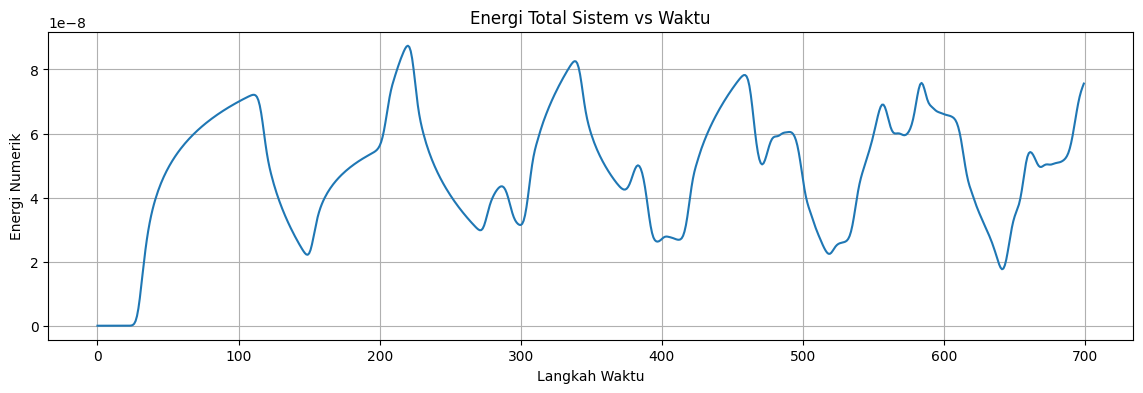

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(energi_total)
plt.title("Energi Total Sistem vs Waktu")
plt.xlabel("Langkah Waktu")
plt.ylabel("Energi Numerik")
plt.grid(True)
plt.show()

Energi total menunjukkan fluktuasi yang tidak menghilang seiring waktu, melainkan berosilasi dalam rentang tertentu. Pola ini merupakan konsekuensi dari sifat domain yang sepenuhnya reflektif tanpa redaman.

### **Pertanyaan**

1. Grafik menunjukkan energi total yang berfluktuasi naik–turun. Menurut Anda, apakah fluktuasi tersebut masih berada dalam batas toleransi metode FDTD, atau justru menunjukkan indikasi ketidakstabilan numerik? Jelaskan alasan Anda berdasarkan tren kurva.
2.  Apa yang menyebabkan energi total tidak langsung menurun, tetapi justru berosilasi? Kaitkan fenomena ini dengan pemantulan gelombang pada dinding ruangan numerik.

### **Jawaban**

1. Fluktuasi energi yang teramati tidak menunjukkan gejala ketidakstabilan numerik. Ketidakstabilan umumnya ditandai oleh peningkatan energi yang bersifat divergen, sedangkan pada grafik ini energi tetap terjaga dalam kisaran tertentu. Osilasi yang muncul merupakan karakteristik alami dari sistem tanpa redaman, di mana energi tidak mengalami disipasi dan terus berinteraksi melalui refleksi berulang. Oleh karena itu, pola tersebut masih berada dalam batas toleransi metode FDTD selama kondisi stabilitas CFL terpenuhi.
2. Energi tidak menunjukkan penurunan karena domain simulasi menggunakan batas reflektif yang memantulkan seluruh energi kembali ke dalam sistem. Dengan tidak adanya mekanisme absorbsi atau redaman viskositas, energi yang dipancarkan dari sumber akan terus berpropagasi dan dipantulkan tanpa kehilangan. Interaksi antara gelombang-gelombang yang bergerak dan pantulan dari batas menyebabkan fluktuasi energi total berupa osilasi. Dinamika osilasi ini merupakan manifestasi langsung dari interferensi temporal gelombang dalam ruang tertutup.